In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import the database from csv
df1=pd.read_csv(r'C:\Users\diego\OneDrive - Universidad de la Sabana\DATA SCIENCE\PORTAFOLIO\toyota.csv')
#Inspect database
print(df1.head())




   model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0
2   GT86  2015  13998       Manual    27469   Petrol  265  36.2         2.0
3   GT86  2017  18998       Manual    14736   Petrol  150  36.2         2.0
4   GT86  2017  17498       Manual    36284   Petrol  145  36.2         2.0


In [2]:
print(df1.info())
#There are NON NULL values. 
print(df1.describe())
#All the numerical values are OK, make sense and are in the specific ranges specified in the task.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB
None
              year         price        mileage          tax          mpg  \
count  6738.000000   6738.000000    6738.000000  6738.000000  6738.000000   
mean   2016.748145  12522.391066   22857.413921    94.697240    63.042223   
std       2.204062   6345.017587   19125.464147    73.880776    15.836710   
min    1998.000000    850.000000       2.000

In [3]:
print(df1['model'].unique())
print(df1['model'].nunique())
#The value is 18, is correct.

print(df1['year'].min())
print(df1['year'].max())
#The year column range is from 1998 to 2020. Ok

print(df1['transmission'].unique()) #The specified transmissions

print(df1['fuelType'].unique()) #The specified fuel types

print(df1[df1.duplicated()==True])
#There are 39 duplicates. However, in this case there can be duplicates, because only the price and mileage change in a same model car. It is possible that two cars with the same mileage are sold at the same price. 

[' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']
18
1998
2020
['Manual' 'Automatic' 'Semi-Auto' 'Other']
['Petrol' 'Other' 'Hybrid' 'Diesel']
         model  year  price transmission  mileage fuelType  tax   mpg  \
178    Corolla  2019  17960       Manual     4500   Petrol  145  39.2   
286    Corolla  2019  15991       Manual       10   Petrol  145  39.2   
397       RAV4  2016  17495    Automatic    58100   Hybrid   20  55.4   
398       RAV4  2017  16295       Manual    34633   Diesel  125  60.1   
446       RAV4  2014  10999       Manual    57942   Diesel  145  53.0   
459       RAV4  2015  13500       Manual    45757   Diesel  125  57.6   
460       RAV4  2015  13500       Manual    45757   Diesel  125  57.6   
764       RAV4  2016  18795    Automatic    57000   Hybrid   20  55.4   
1178     Yaris  2016  10495    Automatic    33705   Hybrid    0

EXPLORATORY DATA ANALYSIS

C:\Users\diego\AppData\Local\Temp\ipykernel_11240\3948400050.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fueltypescars=sns.catplot(x='fuelType',data=df1,kind='count',order=fueltypeorder,palette=custom_palette)


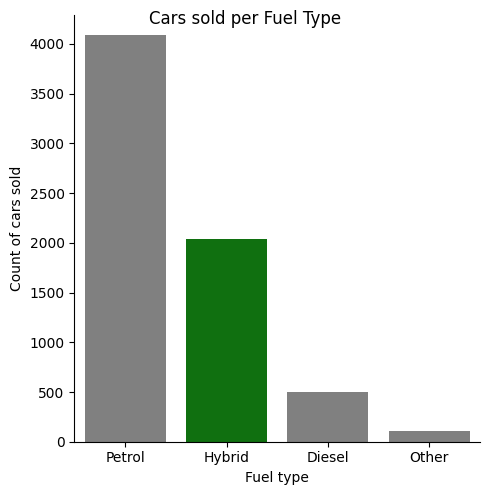

fuelType
Petrol    0.606560
Hybrid    0.303206
Diesel    0.074651
Other     0.015583
Name: proportion, dtype: float64


In [4]:
# NUMBER OF CARS SOLD FOR DIFFERENT FUEL TYPES
fueltypeorder=['Petrol','Hybrid','Diesel','Other']
custom_palette = {
    'Petrol': 'gray',
    'Hybrid': 'green',
    'Diesel': 'gray',
    'Other': 'gray'}
fueltypescars=sns.catplot(x='fuelType',data=df1,kind='count',order=fueltypeorder,palette=custom_palette)
fueltypescars.fig.suptitle('Cars sold per Fuel Type')
fueltypescars.set_axis_labels('Fuel type','Count of cars sold')
plt.show()

carssold=df1['fuelType'].value_counts(normalize=True)
print(carssold)
#We can see that the sold of petrol cars in the last 6 months is way superior to all other types, taking the 60.65% of total cars sold.
#Hybrid cars by the way, take the almost the 30% of the total cars sold in the last 6 months, being the half as petrol ones, which is good and indicates there is a big improvement trail. 

C:\Users\diego\AppData\Local\Temp\ipykernel_11240\3020432448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fueltypesales=sns.catplot(x='fuelType',y='price',data=df1,kind='bar',order=fueltypeorder,palette=custom_palette,estimator='sum')


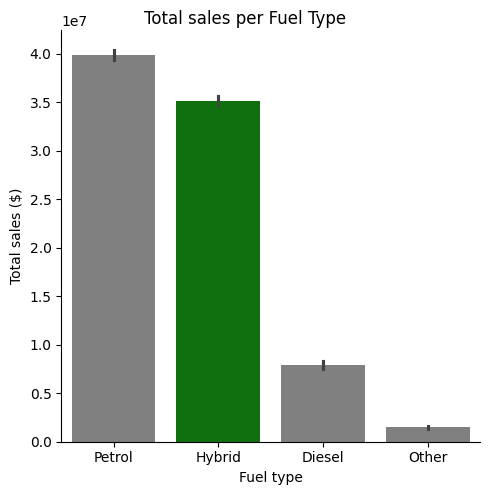

fuelType
Diesel    0.093581
Hybrid    0.416113
Other     0.017573
Petrol    0.472733
Name: price, dtype: float64
0.11977040973338059


In [ ]:
#SALES PER DIFFERENT FUEL TYPES

fueltypesales=sns.catplot(x='fuelType',y='price',data=df1,kind='bar',order=fueltypeorder,palette=custom_palette,estimator='sum')
fueltypesales.fig.suptitle('Total sales per Fuel Type')
fueltypesales.set_axis_labels('Fuel type','Total sales ($)')
plt.show()

#Percentage of sales per fueltype
carssold=df1.groupby('fuelType')['price'].sum()/df1['price'].sum()
print(carssold)

#Ratio between petrol and hybrid sales
hyb_pet_ratio=(df1[df1['fuelType']=='Petrol']['price'].sum() -df1[df1['fuelType']=='Hybrid']['price'].sum() )/df1[df1['fuelType']=='Petrol']['price'].sum()
print(hyb_pet_ratio)

#Despite the total # of cars sold is almost half for hybrid cars, compared to petrol cars, 
#in sales the hybrid cars are really close to Petrol cars, with a difference of just 5.6% in the grand percentage and 12% behind in gross sales.
#This might be caused by a considerable HIGHER price on Hybrid cars, which may be affecting the customer interest. Lest seek in that. We must look also at the price distribution, to get the most common price range for customers.


10795.0


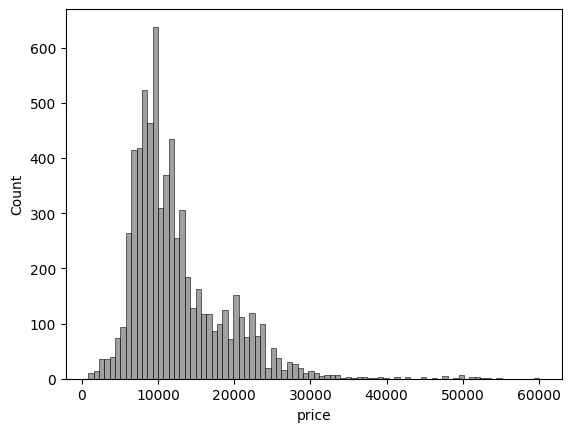

In [33]:
#PRICE DISTRIBUTION ANALYSIS
sns.histplot(data=df1,x='price',color='gray')
median=df1['price'].quantile(0.5)
print(median)
plt.show()
#The distribution is right-skewed, so the median is adequate to get a measure of center. In this case, the median price of cars bought by
#customers is $ 10795.

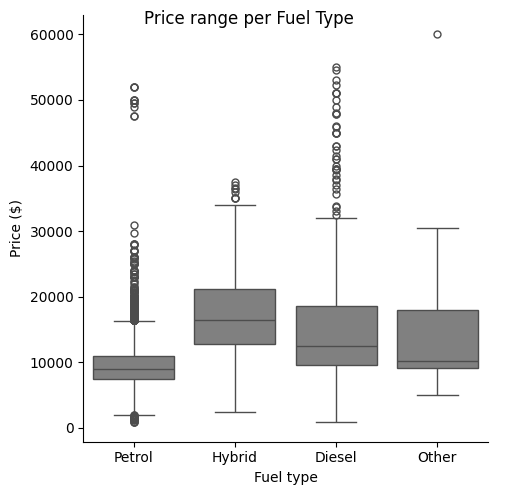

The Petrol fuel type price ranges most between 7395.0 and 10998.0, with a median price of 8998.0
12750.0
The Hybrid fuel type price ranges most between 12750.0 and 21250.0, with a median price of 16490.0


In [34]:
#OVERALL PRICE ANALYSIS PER FUEL TYPE
fueltypeavgsales=sns.catplot(kind='box',data=df1,x='fuelType',y='price',order=fueltypeorder,color='gray')
fueltypeavgsales.fig.suptitle('Price range per Fuel Type')
fueltypeavgsales.set_axis_labels('Fuel type','Price ($)')
plt.show()

fuel=['Petrol','Hybrid']
for col in fuel: 
    percentile25=df1[df1['fuelType']==col]['price'].quantile(0.25)
    percentile50=df1[df1['fuelType']==col]['price'].quantile(0.5)
    percentile75=df1[df1['fuelType']==col]['price'].quantile(0.75)
    iqr=(percentile75-percentile25)
    topiqr=percentile75+(iqr*1.5)
    botiqr=percentile25-(iqr*1.5)
    if col == 'Petrol':
        print(f'The {col} fuel type price ranges most between {percentile25} and {percentile75}, with a median price of {percentile50}')
    else:
        print(iqr*1.5)
        print(f'The {col} fuel type price ranges most between {percentile25} and {percentile75}, with a median price of {percentile50}')

#We can see that notably the hybrid price range is over the petrol base range.
#The hybrid price range is above the median overall price of cars that most customers buy. 
#The stategy followed up by the company should aim to get the range of hybrid cars closer to the median, for them to be more attractive to the customers.

#Lets seek on the price and cars sold on the hybrid category, too determine which models should be mostly promoted or adjusted.

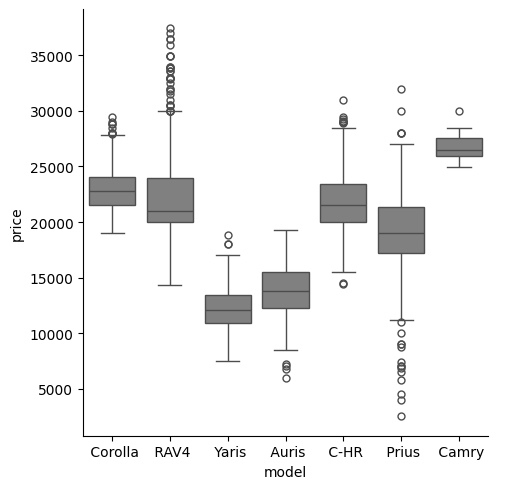

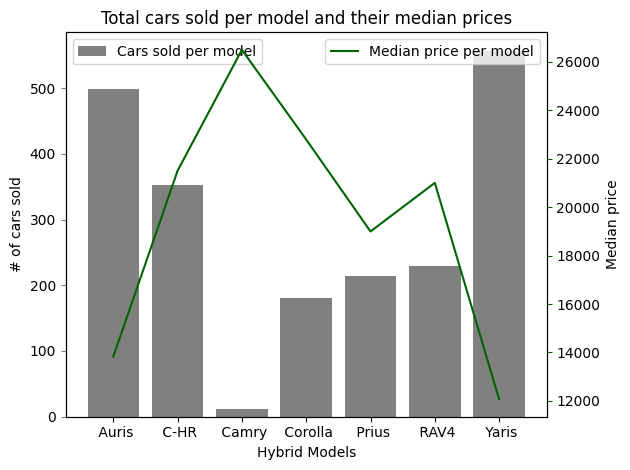

In [57]:
#HYBRID CARS MODEL LOOKUP
hybrid=df1[df1['fuelType']=='Hybrid']

#Look for sales distribution of every model to determine measure of center
sns.catplot(data=hybrid,kind='box',x='model',y='price',color='gray')
#There are models with various outliers, as Prius and RAV4, which may affect the mean validity as a central measure due to skewness. The rest of models look 
#more symmetric, however, I think its more accerted to use the MEDIAN as measure of center for the price.
#This graph also shows the distribution of the price of each model. We can see that Yaris, Auris and Prius have values in the range of the overall median.
plt.show()


#Count # of sales per model
model_sold=hybrid['model'].value_counts().sort_index()
#Median price per model
model_price=hybrid.groupby('model')['price'].median().sort_index()
#Take the models (Index) as a single variable
models=model_sold.index

#Create stacked column and line chart to compare sales volume and median price. 
#Subplot returns 2 objects: The figure itself, and the axis objects (Where we draw the graph). So two variables must be assigned
#Use subplots to be able to have 2 different axis.
fig, ax1= plt.subplots()
#Construction of the first graph on 1 axis. # of cars sold
ax1.bar(models,model_sold,color="gray",label='Cars sold per model')
#Customize left axis
ax1.set_ylabel('# of cars sold')
ax1.tick_params(axis='y',color='gray')
ax1.set_xlabel('Hybrid Models')
#Create another Y axis, with the same X axis
ax2=ax1.twinx()
#Create a lineplot in the new Y axis (ax2)
ax2.plot(models,model_price,color="darkgreen",label='Median price per model')
#Custom right Y axis
ax2.set_ylabel('Median price')
ax2.tick_params(axis='y',color='darkgreen')
#Adjust graph title
plt.title('Total cars sold per model and their median prices')


# Agrega leyenda de las barras
ax1.legend(loc='upper left')

# Agrega leyenda de la línea
ax2.legend(loc='upper right')

# Rótulos legibles
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
 

Now we see that the models with most cars sold are Auris and Yaris. Both have also the lowest price. Other model that can have lower prices is Prius, which median price is the third lower, and has registered solds in the range of 10.000 aprox. 
Prius is actually not in the top of most sold hybrid cars, maybe due to its higher median price compared with Auris and Yaris. Probably, if Prius price decrease to similar price as Auris and Yaris, and all three aproximate more to the median overall value (All have registered sales on that range), the overall cars sold of these three models may increase.

We already know in which models the company can focus their campaign, now we can seek into other variables that may promote the adquisition of used hybrid cars instead of a petrol based car, as the taxes.

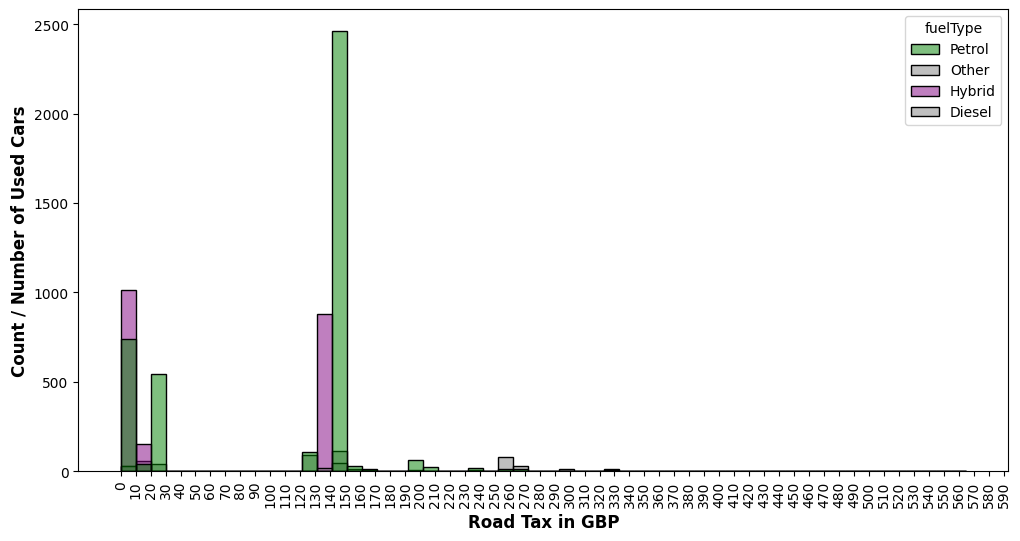

In [ ]:
# TAX ANALYSIS
custom_palette = {
    'Petrol': 'green',
    'Hybrid': 'purple',
    'Diesel': 'gray',
    'Other': 'gray'}
plt.figure(figsize=(12, 6))
sns.histplot(data=df1,x='tax', binwidth=10, hue='fuelType',palette=custom_palette, edgecolor='black')

# Ejes personalizados
plt.xlabel("Road Tax in GBP", fontsize=12, fontweight='bold')
plt.ylabel("Count / Number of Used Cars", fontsize=12, fontweight='bold')
plt.xticks(ticks=range(0, 600, 10), rotation=90)

plt.show()

#Looking at taxes for different fuel types we can see that most hybrid cars pay 0 taxes, while most of petrol based cars pay $ 140 of tax.
#This may be a plus for the customers, and a way for the team to approach to the clients and improve the promotion of hybrid cars.

FINAL CONCLUSIONS:

- The metric the company should take care of is the percentage of hybrid / electric car sold. If this value increase over time, means that the promotion is working.
Currently, the 30% of cars sold in the company are hybrids, we need to increase this metric in the following months with the applied strategies.

RECOMMENDATIONS:

- Monitor the evolution of the hybrid car sales in the next 6 months by checking for key metrics as the percentage of hybrid cars sold.
- Promote tax reduction of hybrid cars compared to petrol based cars to incentive the adquisicion of this type of cars
- Promote the most cheaper models, Auris, Prius and Yaris. Try to approximate the most to the median price value of $ 10.795. These models have the possibility to reduce a bit their price to be more attractive to the customer, specially the Prius model, which is the most expensive one. According to the analysis, if the Prius price model reduces, it would be more attractive to customers and increase its sales.
- For future analysis, a more detailed data collection is recommended, specially in electric cars itself, in order to be able to make a robust analysis in this fuel type car.  